# Importing Dataset & Libraries

In [1]:
# Need to have installed to run: pandas, numpy, sklearn, imblearn, yellowbrick, matplotlib

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN 

from yellowbrick.classifier import ClassificationReport
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Setting up test/train datasets

In [37]:
# test and train split, drop the first column, 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), df['Class'], test_size=0.20)

print("Train datax shape : " + str(X_train.shape))
print("Train datay shape : " + str(y_train.shape))
print("Test data shape : " + str(X_test.shape))
print("Test data shape : " + str(y_test.shape))

from collections import Counter

# Perform oversampling with SMOTE, along with cleaning with ENN
sme = SMOTEENN()
X_train_SME, y_train_SME = sme.fit_sample(X_train, y_train)
print('Size for resampled dataset by class %s' % Counter(y_train_SME))
print('Size for original dataset by class %s' % Counter(y_train))

Train datax shape : (227845, 30)
Train datay shape : (227845,)
Test data shape : (56962, 30)
Test data shape : (56962,)
Size for resampled dataset by class Counter({1: 218768, 0: 210153})
Size for original dataset by class Counter({0: 227445, 1: 400})


# RFC (with and without sampling)

In [38]:
# Random Forest Classifier with sampling
rfc1 = RandomForestClassifier(random_state=42)
rfc1 = rfc1.fit(X_train_SME,y_train_SME)

y_pred_SME = rfc1.predict(X_test)


In [39]:
# Random Forest Classifier without sampling
rfc = RandomForestClassifier(random_state=41)
rfc = rfc.fit(X_train,y_train)

y_pred_SME_1 = rfc.predict(X_test)

In [40]:
print((accuracy_score(y_test,y_pred_SME)))
print(f1_score(y_test,y_pred_SME, average='macro'))
print(classification_report(y_test, y_pred_SME))
print(classification_report(y_test, y_pred_SME_1))

0.9995435553526912
0.9292335303246918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.86      0.86      0.86        92

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.95      0.82      0.88        92

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [41]:
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import ConfusionMatrixDisplay

def make_vis(model_clf,train,val):
    viz = ClassificationReport(model_clf, classes=['0', '1'], support = True)
    viz.fit(train, np.ravel(y_train))
    viz.score(val, np.ravel(y_test))
    viz.poof()
    
def make_cmatrix(predictions,clf_name):
    cm = confusion_matrix(y_test, predictions)
    cm_display = ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
    cm_display.plot(values_format='d')
    plt.title("Confusion Matrix: "+clf_name)
    plt.grid(False)
    plt.show()

    

    

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


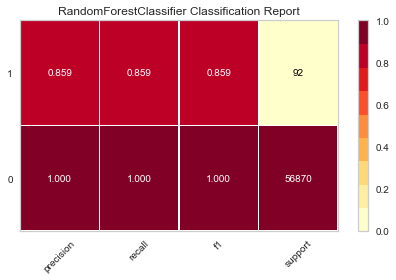

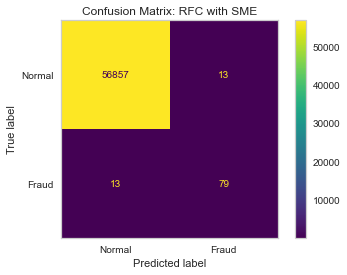

In [42]:
make_vis(rfc1,X_train_SME , X_test)
make_cmatrix(y_pred_SME,"RFC with SME")

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


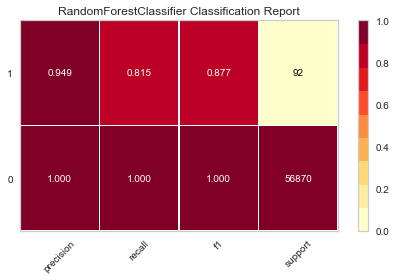

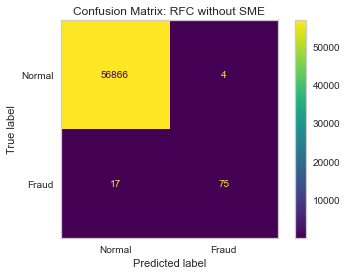

In [43]:
make_vis(rfc,X_train , X_test)
make_cmatrix(y_pred_SME_1,"RFC without SME")

# KNN

In [44]:
from sklearn.preprocessing import StandardScaler

# Standard scale the data for KNN Neighbors
scaler = StandardScaler()
scaler.fit(X_train)

X_train_KNC = scaler.transform(X_train)
X_test_KNC = scaler.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(X_train_KNC, y_train)

In [46]:
y_pred = classifier.predict(X_test_KNC)

In [47]:
print(f1_score(y_test,y_pred, average='macro'))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9276357755960526
0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.91      0.80      0.86        92

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



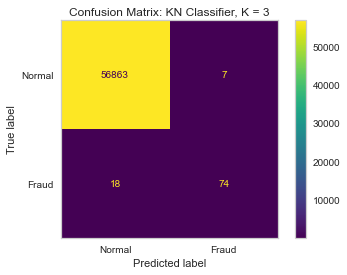

In [48]:
make_cmatrix(y_pred, "KN Classifier, K = 3")

In [49]:

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# y_train = np.array(y_train)


rfc = RandomForestClassifier()
rfc = rfc.fit(X_train_KNC, y_train)

y = rfc.predict(X_test_KNC)
f1_score(y_test,y, average='macro')


0.9385041859701868

In [50]:
print(f1_score(y_test,y, average='macro'))
print(accuracy_score(y_test,y))
print(classification_report(y_test, y))

0.9385041859701868
0.9996313331694814
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.95      0.82      0.88        92

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



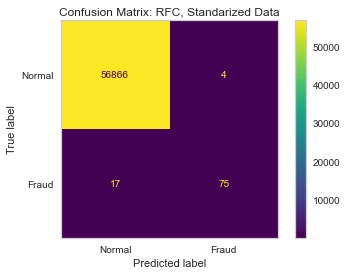

In [51]:
make_cmatrix(y, "RFC, Standarized Data")

In [ ]:
#PCA was applied, but did not perform well. Possibly due to dataset having been 

# from sklearn.decomposition import PCA

# pca = PCA(n_components=24)
# pca.fit(X_train_scaled)
# X_train_scaled_pca = pca.transform(X_train_scaled)
# X_test_scaled_pca = pca.transform(X_test_scaled)

# rfc = RandomForestClassifier()
# rfc = rfc.fit(X_train_scaled_pca, y_train)
# #display(rfc.score(X_train_scaled, y_train))

# y = rfc.predict(X_test_scaled_pca)
# f1_score(y_test,y, average='macro')


In [ ]:
#k = 1
# 0.9072535409634808
# 0.999385555282469
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56867
#            1       0.82      0.81      0.81        95

#     accuracy                           1.00     56962
#    macro avg       0.91      0.91      0.91     56962
# weighted avg       1.00      1.00      1.00     56962

# 2
# 0.9197620223900125
# 0.9994908886626171
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56859
#            1       0.97      0.74      0.84       103

#     accuracy                           1.00     56962
#    macro avg       0.99      0.87      0.92     56962
# weighted avg       1.00      1.00      1.00     56962

# k = 3
# 0.9220991388068331
# 0.9995084442259752
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56867
#            1       0.89      0.80      0.84        95

#     accuracy                           1.00     56962
#    macro avg       0.95      0.90      0.92     56962
# weighted avg       1.00      1.00      1.00     56962

# k = 238
# 0.4996618268377735
# 0.9986482216214319
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56885
#            1       0.00      0.00      0.00        77

#     accuracy                           1.00     56962
#    macro avg       0.50      0.50      0.50     56962
# weighted avg       1.00      1.00      1.00     56962

#k = 20
# 0.49952994719593735
# 0.998121554720691
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56855
#            1       0.00      0.00      0.00       107

#     accuracy                           1.00     56962
#    macro avg       0.50      0.50      0.50     56962
# weighted avg       1.00      1.00      1.00     56962

# k = 5
# 0.9160799393015255
# 0.9994557775359011
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56863
#            1       0.90      0.78      0.83        99

#     accuracy                           1.00     56962
#    macro avg       0.95      0.89      0.92     56962
# weighted avg       1.00      1.00      1.00     56962

# k = 4
# 0.9032596377318922
# 0.999403110845827
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56863
#            1       0.92      0.72      0.81        99

#     accuracy                           1.00     56962
#    macro avg       0.96      0.86      0.90     56962
# weighted avg       1.00      1.00      1.00     56962